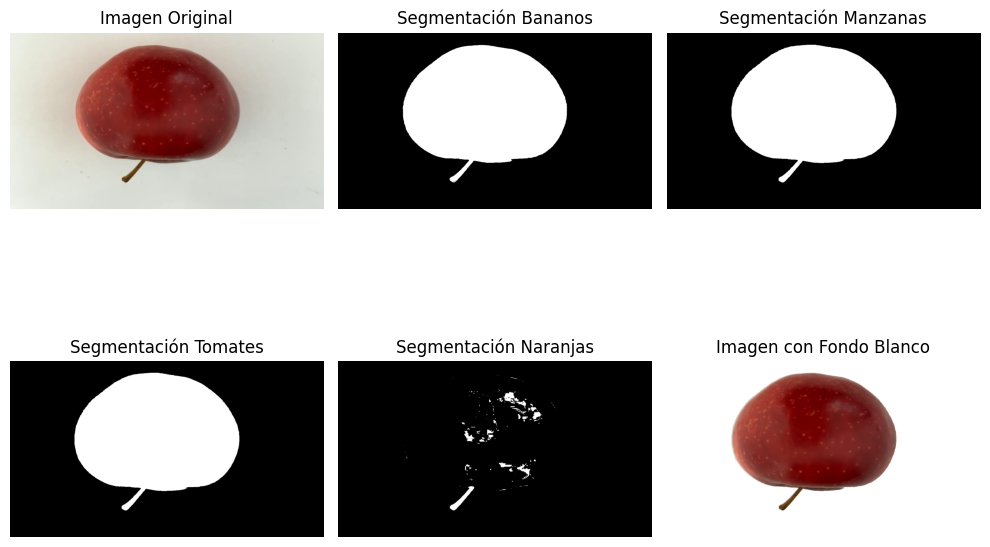

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para segmentar frutas basadas en color HSV con rangos ampliados
def segment_fruit(image):
    # Convertir la imagen a HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Definir rangos de colores ampliados en el espacio HSV para cada fruta
    # Banano (amarillo)
    lower_banana = np.array([0, 60, 60])  # Más amplio en H, menor S y V
    upper_banana = np.array([255, 255, 255])  # Más amplio en H
    
    # Manzana (rojo, verde, amarillo)
    lower_apple = np.array([0, 50, 50])  # Más amplio en S y V para rojo claro
    upper_apple = np.array([255, 255, 255])  # Más amplio en H
    
    # Tomate (rojo)
    lower_tomato = np.array([0, 50, 50])  # Más amplio en S y menor V
    upper_tomato = np.array([255, 255, 255])
    
    # Naranja (naranja)
    lower_orange = np.array([10, 70, 50])  # Más amplio en H
    upper_orange = np.array([255, 255, 255])
    
    # Segmentar por cada fruta
    mask_banana = cv2.inRange(hsv, lower_banana, upper_banana)
    mask_apple = cv2.inRange(hsv, lower_apple, upper_apple)
    mask_tomato = cv2.inRange(hsv, lower_tomato, upper_tomato)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    
    # Combinación de todas las máscaras
    mask_fruit = mask_banana | mask_apple | mask_tomato | mask_orange
    
    # Crear una imagen de fondo blanco
    white_background = np.ones_like(image) * 255  # Fondo blanco
    
    # Crear la imagen con fondo blanco donde no hay fruta segmentada
    final_image = cv2.bitwise_and(image, image, mask=mask_fruit)  # Frutas segmentadas
    background = cv2.bitwise_and(white_background, white_background, mask=cv2.bitwise_not(mask_fruit))  # Fondo blanco
    final_image = cv2.add(final_image, background)  # Combinar frutas segmentadas con fondo blanco
    
    return final_image, mask_banana, mask_apple, mask_tomato, mask_orange, mask_fruit

# Cargar la imagen
image = cv2.imread('../04_execution/captured_images/imagen_22.jpg')  # Reemplazar con la ruta de tu imagen

# Llamar a la función de segmentación
final_image, mask_banana, mask_apple, mask_tomato, mask_orange, mask_fruit = segment_fruit(image)

# Mostrar la imagen original y la imagen segmentada con fondo blanco
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(mask_banana, cmap='gray')
plt.title('Segmentación Bananos')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(mask_apple, cmap='gray')
plt.title('Segmentación Manzanas')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_tomato, cmap='gray')
plt.title('Segmentación Tomates')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(mask_orange, cmap='gray')
plt.title('Segmentación Naranjas')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fondo Blanco')
plt.axis('off')

plt.tight_layout()
plt.show()
